In [3]:
import numpy as np
from sklearn import preprocessing
feature = np.array([
    [-500.5],
    [-100.1],
    [0],
    [100.1],
    [900.9]
    ])
#  scaler
## generacion de min max para establecer una escala mas adecuada
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))


# se genera la transformacion
scaled_feature = minmax_scale.fit_transform(feature)
## con eso genera un rango de 0 a 1
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

Min - max es una forma de generar un rango
en base a los valores maximos y minimos de un conjunto, con un valor arbitrario x y el minimo

$x = \dfrac{x - x_{min}}{x_{max} - x_{min}}$

asi genenrado un rango de $[x_{max}, x_{min}]$


#Otra metrica de estandarizacion

In [6]:
import numpy as np
from sklearn import preprocessing
# Create feature
x = np.array([[-1000.1],
[-200.2],
[500.5],
[600.6],
[9000.9]])

# con standar scaler que es para la desviacion estandar
scaler = preprocessing.StandardScaler()

# transformacion
scalerTransformado = scaler.fit_transform(x)
scalerTransformado

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

Escalado de desviacion estandar, es una forma de generar un rango
en base a los valores de promedio 0 y desviacion estandar 1.

$x' = \dfrac{x - ̅x}{σ}$

In [7]:
print("Promedio:", round(scalerTransformado.mean()))
print("Desviacion estandar:", scalerTransformado.std())

Promedio: 0
Desviacion estandar: 1.0


In [11]:
robust_scaler = preprocessing.RobustScaler()
robust_scalerTransformado =robust_scaler.fit_transform(x)

In [12]:
print("Promedio:", round(robust_scalerTransformado.mean()))
print("Desviacion estandar:", robust_scalerTransformado.std())

Promedio: 2
Desviacion estandar: 4.565023609817704


| **Scaler**         | **Centrado en** | **Escalado por**         | **Cuándo usarlo**                                                       |
|--------------------|-----------------|---------------------------|-------------------------------------------------------------------------|
| `StandardScaler`   | Media ($\mu$)   | Desviación estándar ($\sigma$) | Datos sin outliers significativos. Funciona bien si los datos son aproximadamente normales. |
| `MinMaxScaler`     | Mínimo ($x_{min}$) | Rango ($x_{max} - x_{min}$) | Quieres transformar los datos a un rango específico, como [0, 1]. Sensible a outliers. |
| `RobustScaler`     | Mediana         | Rango intercuartílico (IQR = Q3 - Q1) | Los datos tienen outliers y quieres minimizar su impacto en la escala. |


# Normas


In [13]:
from sklearn.preprocessing import Normalizer
features = np.array([[0.5, 0.5],
[1.1, 3.4],
[1.5, 20.2],
[1.63, 34.4],
[10.9, 3.3]])

normalizador = Normalizer(norm="l2")

normalizadorConDatos = normalizador.transform(features)
normalizadorConDatos

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [14]:
# norma 1
features_l1_norm = Normalizer(norm="l1").transform(features)
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [19]:
print("Suma",
features_l1_norm[3, 0] + features_l1_norm[3, 1])

Suma 1.0


# Generacion de polinomios


In [20]:
from sklearn.preprocessing import PolynomialFeatures
features = np.array([[2, 3],
[2, 3],
[2, 3]])

polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)
# transformacion
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

# Generacion de caracteristicas

In [25]:
from sklearn.preprocessing import FunctionTransformer
features = np.array([[2, 3],
[2, -3],
[-2, 2]])
## como es una caracteristica puede llegar a ser alguna funcion
def add_ten(x: int) -> int:
  return x + 10

def enteros(x: int) -> int:
  if (x > 0):
    return "Positivo"
  else:
    return "Negativo"

## transformador
ten_transformer = FunctionTransformer(add_ten)
# aplicar esa funcion
ten_transformer.transform(features)


## generacion de la vectorizacion para cada valor evitando el array, esta sigue siendo una funcion
vectorized_enteros = np.vectorize(enteros)
ten_transformer = FunctionTransformer(vectorized_enteros)
ten_transformer.transform(features)


array([['Positivo', 'Positivo'],
       ['Positivo', 'Negativo'],
       ['Negativo', 'Positivo']], dtype='<U8')

In [27]:
import pandas as pd
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,12,7
2,8,12


In [28]:
import pandas as pd
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])
df.apply(vectorized_enteros)

,feature_1,feature_2
0,Positivo,Positivo
1,Positivo,Negativo
2,Negativo,Positivo


#Deteccion de valores atipicos
Estos son valores los cuales llegan a variarian demasiado y entorpece el analisis
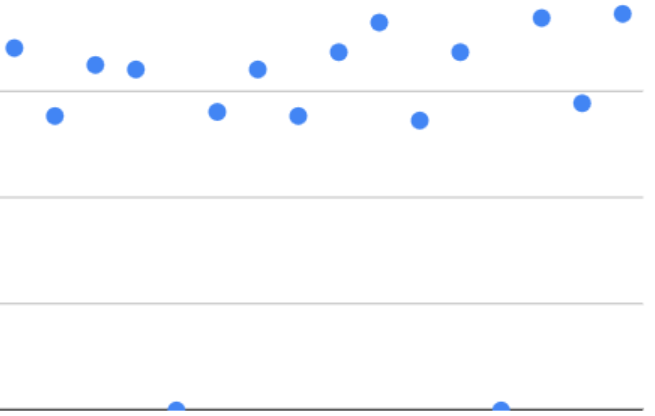

In [29]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
# Create simulated data
features, _ = make_blobs(n_samples = 10,
n_features = 2,
centers = 1,
random_state = 1)

In [30]:
features[0,0] = 10000
features[0,1] = 10000

In [31]:
## genrea la elipse de datos dispersos
outlier_detector = EllipticEnvelope(contamination=.1)
# entrena
outlier_detector.fit(features)
#predice
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])